# Bloch Equation

The Bloch Equation, named after physicist Felix Bloch who won a Nobel Prize for discovery of magnetic resonance phenomena, describes almost all behavior seen in MRI.  Here, we will describe this equation and derive key results to use for explaining the behavior of the net magnetization and its interaction with magnetic fields.

## Learning Goals

1. Understand what MRI is measuring
    * Mathematically define the net magnetization
1. Describe the concepts of polarization, resonance, excitation, and relaxation
    * Describe the rotation of the net magnetization due to interaction with magnetic fields
    * Understand how to use the rotating frame to simplify descriptions of magnetic resonance
    * Describe the process of relaxation 

## THE Bloch Equation

The Bloch equation describes the behavior of the net magnetization, $\vec{M}(\vec{r},t)$, in a magnetic field, $\vec{B}(\vec{r},t)$, and can describe the vast majority of all MRI phenomena.  While the complete Bloch Equation is presented here, we can typically use results derived from this equation to analyze and design MRI experiments.

$$
\frac{d\vec{M}(\vec{r},t)}{dt} =
\gamma \vec{M}(\vec{r},t) \times \vec{B}(\vec{r},t)
+
\begin{bmatrix}
-1/T_2(\vec{r})& 0 & 0 \\
0 & -1/T_2(\vec{r}) & 0 \\
0 & 0 & -1/T_1(\vec{r})
\end{bmatrix}
\vec{M}(\vec{r},t)
+
\begin{bmatrix}
 0 \\
 0 \\
M_0(\vec{r})/T_1(\vec{r})
\end{bmatrix}
$$

The beavhior depends on constants of:
* $M_0(\vec{r})$ - the equilibrium magnetization
* $T_1(\vec{r})$ - the longitudinal ($M_Z$) or spin-lattice relaxation time constant
* $T_2(\vec{r})$ - the transverse ($M_{XY}$) or spin-spin relaxation time constant

All of which can vary across our subject (and all a valuable source of contrast!).

There is a very full-featured, interactive Bloch Equation Simulator available online, that is valuable to understand the behavior of the net magnetization:  
[Bloch Equation Simulator](https://www.drcmr.dk/BlochSimulator/)


## Precession

The first term in the Bloch equation means that the 
net magnetization, $\vec{M}$ rotates around the magnetic field, $\vec{B}$, with a left-handed rotation.  This rotation is sometimes referred to as precession.

To observe this, we neglect relaxation ($T_1, T_2 \rightarrow \infty$):

$$
\frac{d\vec{M}(t)}{dt} =
\gamma \vec{M}(t) \times \vec{B}(t)
$$


![RF reception](images/RF_reception.gif)


### Simulation of Precession

Open up the [Bloch Equation Simulator](https://www.drcmr.dk/BlochSimulator/).  You will see a visualization of a net magnetization vector that is precessing around the magnetic field (thin line).

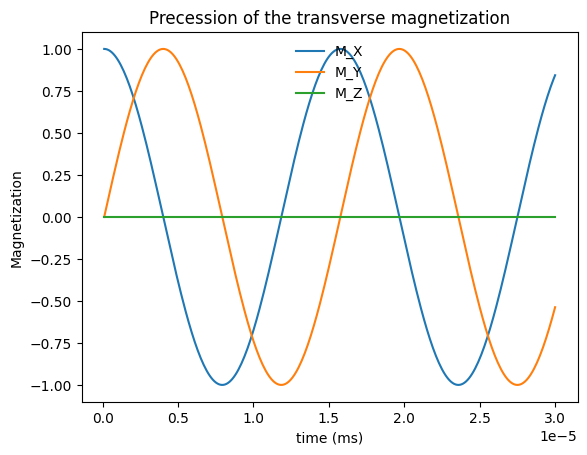

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
B0 = 1.5e3  # 1.5 T = 1500 mT
dt = 0.1e-6  # 0.1 ns = 0.1e-6 ms
N = 300  # Number of time steps
t = np.arange(1, N + 1) * dt  # Time vector in ms

# Initial magnetization
Mstart = np.array([1, 0, 0])  # After RF excitation

# Static magnetic field
Bstatic = np.array([0, 0, B0])  # Magnetic field in mT

# Placeholder for magnetization over time
Mall = np.zeros((3, N))
Mall[:, 0] = Mstart

# Define the Bloch rotation function
def bloch_rotate(M, dt, B):
    gamma = 42.58  # Gyromagnetic ratio in kHz/mT
    omega = gamma * np.linalg.norm(B) * 2 * np.pi  # Angular frequency in radians/ms
    theta = omega * dt  # Rotation angle
    if np.linalg.norm(B) == 0:
        return M  # No rotation if B is zero
    axis = B / np.linalg.norm(B)  # Rotation axis
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    R = np.array([
        [cos_theta + axis[0]**2 * (1 - cos_theta), axis[0] * axis[1] * (1 - cos_theta) - axis[2] * sin_theta, axis[0] * axis[2] * (1 - cos_theta) + axis[1] * sin_theta],
        [axis[1] * axis[0] * (1 - cos_theta) + axis[2] * sin_theta, cos_theta + axis[1]**2 * (1 - cos_theta), axis[1] * axis[2] * (1 - cos_theta) - axis[0] * sin_theta],
        [axis[2] * axis[0] * (1 - cos_theta) - axis[1] * sin_theta, axis[2] * axis[1] * (1 - cos_theta) + axis[0] * sin_theta, cos_theta + axis[2]**2 * (1 - cos_theta)]
    ])
    return R @ M

# Simulate magnetization over time
for It in range(N - 1):
    Mall[:, It + 1] = bloch_rotate(Mall[:, It], dt, Bstatic)

# Plot the results
plt.plot(t, Mall[0, :], label='M_X')
plt.plot(t, Mall[1, :], label='M_Y')
plt.plot(t, Mall[2, :], label='M_Z')
plt.xlabel('time (ms)')
plt.ylabel('Magnetization')
plt.legend(loc='upper center', frameon=False)
plt.title('Precession of the transverse magnetization')
plt.show()


## RF Excitation

RF excitation occurs when an oscillating magnetic field is applied orthogonally to the main magnetic field.  If we apply RF at the Larmor frequency, the magnetic field would be

$$\vec{B}(\vec{r},t) = 
\begin{bmatrix}
B_{1}^+(\vec{r},t) \cos(2\pi\bar{\gamma} B_0 t) \\
B_{1}^+(\vec{r},t) \sin(2\pi\bar{\gamma} B_0 t) \\
B_0
\end{bmatrix}$$

When applied at the Larmor frequency, the applied RF energy and the net magnetization are in resonance, and we achieve excitation.

### Example: Constant amplitude pulse

A good first RF excitation pulse to consider is a constant amplitude RF pulse, $B_{1}^+(\vec{r},t) = B_{1,0}$.  When this is applied on resonance, the Bloch equation results in a progressive rotation of the net magnetization away from the z-axis, as illustrated below:

![RF excitation Lab Frame](images/RF_hard_lab_frame_on-resonance.gif)

### Lab versus Rotating Frame

For simplification, we use the so-called "rotating frame" - a reference frame that is rotating around the main field (z-axis) at the Larmor frequency, $f_0 = \bar{\gamma} B_0$, which greatly simplifies the interpretation, visualization, and math when analyzing the Bloch equation.  This is in contrast to the "lab frame" or "stationary frame".

In the rotating frame, the magnetic field vector is transformed to both have the rotation of the RF pulse terms removed.  In this transformation of reference frames, the main magnetic field, $B_0$, is also removed.  This change in the representation removes the precession of $\vec{M}$ around the z-axis, as we should expect in the rotating frame.

$$\vec{B}(t) = 
\begin{bmatrix}
B_{1,X}^+(\vec{r},t) \\
B_{1,Y}^+(\vec{r},t) \\
0
\end{bmatrix}$$

Now we can analyze RF excitation as a rotation around RF magnetic field amplitude and do not have to include Larmor frequency in our analysis, shown in the illustration below:

![RF excitation Rotating Frame](images/RF_hard_rotating_frame_on-resonance.gif)



### Common flip angle RF excitations

For a constant amplitude RF pulse, the flip angle depends on the duration of the RF pulse, $T_{rf}$ and the strength of the RF magnetic field, $b_{1,0}$:

$$\theta = \gamma  b_{1,0} T_{rf} $$

| ![RF 45-degree flip](images/RF_45flip.gif) | ![RF 90-degree flip](images/RF_90flip.gif) | ![RF 180-degree flip](images/RF_180flip.gif) |
| :-: | :-: | :-: |
| 45-degree flip | 90-degree flip | 180-degree flip |

### Simulations of RF Excitation

Again, open up the [Bloch Equation Simulator](https://www.drcmr.dk/BlochSimulator/).  
1. Lab versus rotating frame:  The default view is in the lab (stationary) frame.  If you select the 'B0' option from the 'Frame' in the top left it will change to the rotating frame.
1. RF Excitation: Change to 'Equilibrium' scene in bottom left.  Then, use the '90x hard' button to apply a constant amplitude pulse.
1. Other flip angles: Go back to 'Equilibrium' scene, and try the other hard RF pulse flip angles.

Below are additional Bloch equation simulations and associated code for RF excitation show non-resonant magnetic fields, resonant magnetic fields, and excitation in the rotating frame.

First, when a non-resonant magnetic field is applied.   An additional magnetic field is applied orthogonal to the main magnetic field, but *not* applied at the Larmor frequency, and there is no creation of transverse magnetization.

To achieve excitation the RF pulse is applied at the Larmor frequency, $\omega_0 = \gamma B_0$.  With a resonant RF pulse, we have excitation of the net magnetization away from the direction of the main magnetic field, and creation of transverse magnetization, $M_X$ and $M_Y$.

Finally, the simulation is converted into the rotating frame.  It is hard to visualize the transverse magnetization in the lab because it is rotating at the Larmor frequency.  The excitation is more clearly visualized in the rotating frame.

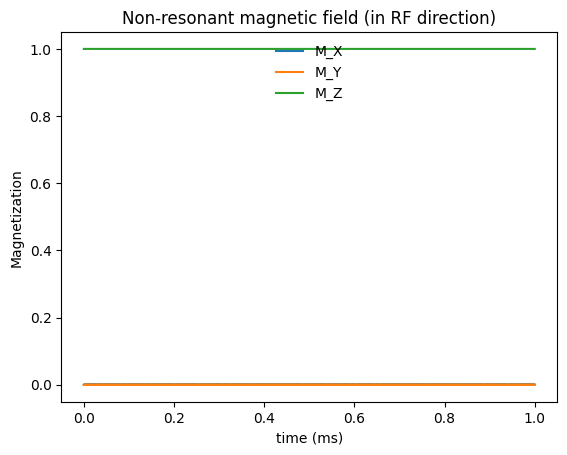

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gammabar = 42.58  # kHz/mT
B0 = 10  # 10 mT for simplicity to visualize rotation
f0 = gammabar * B0  # kHz

M0 = 1.0
M_equilibrium = np.array([0, 0, M0])  # Initial magnetization at equilibrium

# RF pulse parameters
T_RF = 1  # ms
t = np.linspace(0, T_RF, 4000)  # Time vector

RF_flip_angle = np.pi / 2  # radians
B10 = RF_flip_angle / (2 * np.pi * gammabar * T_RF)  # mT

# Define the Bloch rotation function
def bloch_rotate(M, dt, B):
    gammabar = 42.58  # kHz/mT
    omega = gammabar * np.linalg.norm(B) * 2 * np.pi  # Angular frequency in radians/ms
    theta = omega * dt  # Rotation angle
    if np.linalg.norm(B) == 0:
        return M  # No rotation if B is zero
    axis = B / np.linalg.norm(B)  # Rotation axis
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    R = np.array([
        [cos_theta + axis[0]**2 * (1 - cos_theta), axis[0] * axis[1] * (1 - cos_theta) - axis[2] * sin_theta, axis[0] * axis[2] * (1 - cos_theta) + axis[1] * sin_theta],
        [axis[1] * axis[0] * (1 - cos_theta) + axis[2] * sin_theta, cos_theta + axis[1]**2 * (1 - cos_theta), axis[1] * axis[2] * (1 - cos_theta) - axis[0] * sin_theta],
        [axis[2] * axis[0] * (1 - cos_theta) - axis[1] * sin_theta, axis[2] * axis[1] * (1 - cos_theta) + axis[0] * sin_theta, cos_theta + axis[2]**2 * (1 - cos_theta)]
    ])
    return R @ M

# RF not applied at resonance frequency (constant magnetic field in X)
B = np.array([B10, 0, B0])  # Magnetic field vector

Mall = np.zeros((3, len(t)))
Mall[:, 0] = M_equilibrium
for It in range(len(t) - 1):
    dt = t[It + 1] - t[It]
    Mall[:, It + 1] = bloch_rotate(Mall[:, It], dt, B)

# Plot the results
plt.plot(t, Mall[0, :], label='M_X')
plt.plot(t, Mall[1, :], label='M_Y')
plt.plot(t, Mall[2, :], label='M_Z')
plt.xlabel('time (ms)')
plt.ylabel('Magnetization')
plt.legend(loc='upper center', frameon=False)
plt.title('Non-resonant magnetic field (in RF direction)')
plt.show()


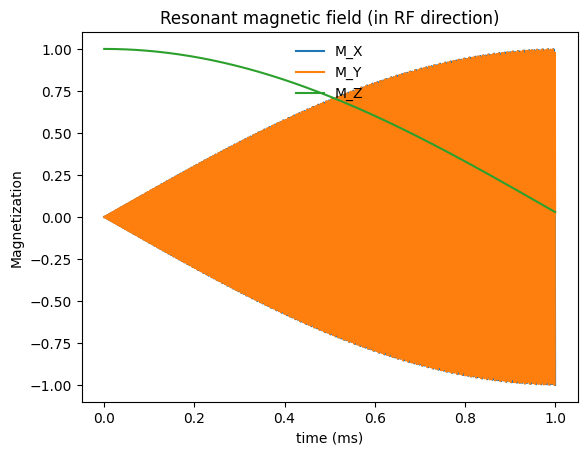

In [28]:
# RF at Larmor resonance frequency
B = np.array([B10 * np.cos(2 * np.pi * f0 * t), B10 * np.sin(2 * np.pi * f0 * t), B0 * np.ones(len(t))])

Mall = np.zeros((3, len(t)))
Mall[:, 0] = M_equilibrium
for It in range(len(t) - 1):
    dt = t[It + 1] - t[It]
    Mall[:, It + 1] = bloch_rotate(Mall[:, It], dt, B[:,It])


# Plot the results
plt.plot(t, Mall[0, :], label='M_X')
plt.plot(t, Mall[1, :], label='M_Y')
plt.plot(t, Mall[2, :], label='M_Z')
plt.xlabel('time (ms)')
plt.ylabel('Magnetization')
plt.legend(loc='upper center', frameon=False)
plt.title('Resonant magnetic field (in RF direction)')
plt.show()


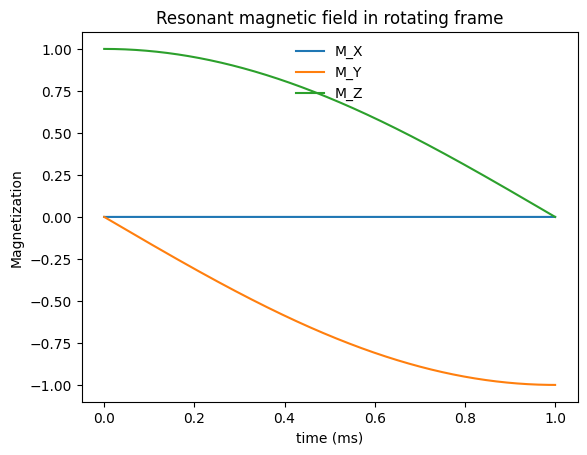

In [ ]:
# RF at Larmor resonance frequency
B = np.array([B10, 0, 0])

Mall = np.zeros((3, len(t)))
Mall[:, 0] = M_equilibrium
for It in range(len(t) - 1):
    dt = t[It + 1] - t[It]
    Mall[:, It + 1] = bloch_rotate(Mall[:, It], dt, B)


# Plot the results
plt.plot(t, Mall[0, :], label='M_X')
plt.plot(t, Mall[1, :], label='M_Y')
plt.plot(t, Mall[2, :], label='M_Z')
plt.xlabel('time (ms)')
plt.ylabel('Magnetization')
plt.legend(loc='upper center', frameon=False)
plt.title('Resonant magnetic field in rotating frame')
plt.show()

## Relaxation

The other key result of the Bloch equation is that the net magnetization will return to equilibriuam over time with specific time constants, called $T_1$ and $T_2$.  More specifically relaxation depends on
* $M_0(\vec{r})$ - the equilibrium magnetization, where the magnetic field ultimately is oriented in the same direction as the main magnetic field along the z-axis as: $\vec{M}(\vec{r}, t \rightarrow \infty) = [0, 0, M_0(\vec{r})]^T$
* $T_1(\vec{r})$ - the longitudinal ($M_Z$) or spin-lattice relaxation time constant
* $T_2(\vec{r})$ - the transverse ($M_{XY}$) or spin-spin relaxation time constant

In the rotating frame, without any applied RF energy, the Bloch equation is simplified to

$$
\frac{d\vec{M}(t)}{dt} =
\begin{bmatrix}
-1/T_2& 0 & 0 \\
0 & -1/T_2 & 0 \\
0 & 0 & -1/T_1
\end{bmatrix}
\vec{M}(t)
+
\begin{bmatrix}
 0 \\
 0 \\
M_0/T_1
\end{bmatrix}
$$

This has solutions of

$$
\vec{M}(t) =
\begin{bmatrix}
e^{-t/T_2} & 0 & 0 \\
0 & e^{-t/T_2} & 0 \\
0 & 0 & e^{-t/T_1}
\end{bmatrix}
\vec{M}(0)
+
\begin{bmatrix}
 0 \\
 0 \\
M_0(1-e^{-t/T_1})
\end{bmatrix}
$$

or

$$M_{XY}(t) = M_{XY}(0) e^{-t/T_2}$$

$$M_Z(t) = M_Z(0)e^{-t/T_1} + M_0(1- e^{-t/T_1})$$

Where here the shorthand complex notation for the transverse magnetization is being used: $M_{XY}(\vec{r},t) = M_X(\vec{r},t) + i M_Y(\vec{r},t)$

**T1 and T2 relaxation after RF Excitation**

![Relaxation T1 and T2](images/relaxation_t1t2.gif)

### Simulation of Relaxation

One more time, open up the [Bloch Equation Simulator](https://www.drcmr.dk/BlochSimulator/).  Under the 'Relaxation' options in the top left, you can adjust T1 and T2 relaxation rates.  
1.  Experiment with different T1 and T2 relaxation values
1.  When the magnetization turns to equilibrium, use a RF pulse and you will see relaxation occurring again.
1.  From Equilibrium, try a 180-degree flip angle and try adjusting both T1 and T2.  Which parameter influence the relaxation in this situation?

Below are additional Bloch equation simulations and associated code of relaxation. 

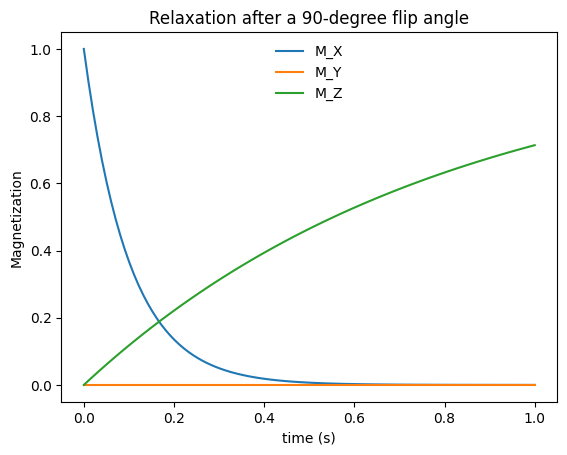

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector
t = np.linspace(0, 1, 100)  # seconds

# Relaxation parameters
M0 = 1.0
T1 = 0.8  # seconds
T2 = 0.1  # seconds

# Initial magnetization
M_equilibrium = np.array([0, 0, M0])

# Flip angle
flip = 90  # degrees

# Gyromagnetic ratio
gammabar = 42.58  # kHz/mT

# RF pulse duration
T = 1e-3  # 1 ms

# Calculate RF pulse amplitude (milliTesla)
B10 = (flip * np.pi / 180) / (2 * np.pi * gammabar * T)

# Define the Bloch RF tip function
def bloch_rftip(M, T, B1):
    # Apply RF tip (simplified for this example)
    theta = gammabar * B1 * T * 2 * np.pi  # Flip angle in radians
    R = np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])
    return R @ M

# Define the Bloch relaxation function
def bloch_relax(M_start, t, M0, T1, T2):
    E1 = np.exp(-t / T1)
    E2 = np.exp(-t / T2)
    Mx = M_start[0] * E2
    My = M_start[1] * E2
    Mz = M_start[2] * E1 + M0 * (1 - E1)
    return np.array([Mx, My, Mz])

# Apply RF tip
M_start = bloch_rftip(M_equilibrium, T, B10)

# Compute magnetization over time
Mall = np.zeros((3, len(t)))
for It in range(len(t)):
    Mall[:, It] = bloch_relax(M_start, t[It], M0, T1, T2)

# Plot the results
plt.plot(t, Mall[0, :], label='M_X')
plt.plot(t, Mall[1, :], label='M_Y')
plt.plot(t, Mall[2, :], label='M_Z')
plt.xlabel('time (s)')
plt.ylabel('Magnetization')
plt.legend(loc='upper center', frameon=False)
plt.title(f'Relaxation after a {flip}-degree flip angle')
plt.show()